# Pandas Notes

In [2]:
import pandas as pd
import numpy as np

FCG: From what I understand, there are two basic data structures in Pandas:
- DataFrame, 2 dimensions
- Series, 1 dimension

# Personal notes (FCG)

## Selecting, differences between .loc, .iloc, .at, .iat, .xs

[DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc)
>Access a group of rows and columns by label(s) or a boolean array.
<br>.loc[] is primarily label based, but may also be used with a boolean array.

[DataFrame.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas-dataframe-iloc)
>Purely integer-location based indexing for selection by position.
<br>.iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

[DataFrame.at](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at)
>Access a single value for a row/column label pair.
<br>Similar to loc, in that both provide label-based lookups. Use at if you only need to get or set a single value in a DataFrame or Series.

[DataFrame.iat](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat)
>Access a single value for a row/column pair by integer position.
<br>Similar to iloc, in that both provide integer-based lookups. Use iat if you only need to get or set a single value in a DataFrame or Series.

[DataFrame.xs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html#pandas.DataFrame.xs)
>Return cross-section from the Series/DataFrame.
<br>This method takes a key argument to select data at a particular level of a MultiIndex.


## Iterations

```python
for col in DataFrame:
    print(col) # Prints column name
```

```python
for row in DataFrame.iterrows():
    print(row) # Prints row as a tuple containing index information and 
```


## Copy DataFrame
```python
df2 = df.copy(deep=True) # Copy and store it in variable
```


## Using [[]] vs []

From what I understand, using [] returns a Series and using [[]] returns a DataFrame.

## groupby, iteration and changes to specific "cell"

```python
'''
df.groupby(level=0) # Groups by level=0 of multiindex
'''

for group_name, group_dataframe in df.groupby(level=0):
    print(group_name)
    print(group_dataframe)
    group_dataframe.iat[0,0] = 9999999 # Change integer location 0,0 to 9999999
    print(group_dataframe)
    df.loc[group_name] = group_dataframe # Rewrite the group's location with the changes made
    break
```

## Append new DataFrame
```python
# Summary
df2 = df.append(df_tmp)
```

```python
# Example
# Create new DataFrame
df_tmp = pd.DataFrame([[99999,1,2,3,4,5]],
                      columns=['id','open','high','low','close','volume'],
                      index=pd.MultiIndex.from_tuples([('AESGENER','2001')], names=['nemo','date']))
# Add new DataFrame, creates a new object
bi_nemo_date2 = bi_nemo_date.append(df_tmp)
```

## Rename index

```python
df.rename({'old_index_name': 'new_index_name'}, axis=1)
```


## stack/unstack

From [Reshape using Stack() and unstack() function in Pandas python - DataScience Made Simple](https://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/)

(Also see[Python Pandas Tutorial 12. Stack Unstack](https://www.youtube.com/watch?v=BUOy4RUUepg))

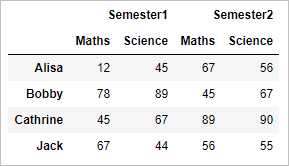

```python
stacked_df=df.stack()
stacked_df
```
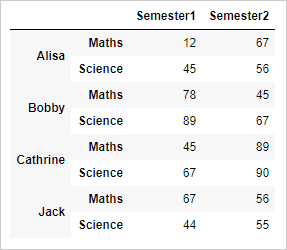

```python
unstacked_df = stacked_df.unstack()
unstacked_df
```
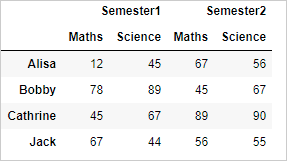


## pivot

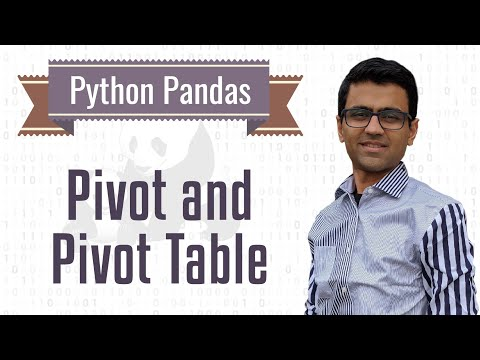

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('xPPs59pn6qU')

# From 10 minutes to pandas — pandas 1.1.0 documentation
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#minutes-to-pandas

## Object creation
From https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#object-creation

```python
# Create a series
pd.Series([1, 3, 5, np.nan, 6, 8])

# Create a DatetimeIndex
dates = pd.date_range('20130101', periods=6)

# Use the DatetimeIndex and create a DataFrame with random numbers
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

# Create DataFrame from dict
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
```

In [42]:
# Create a series
pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [43]:
# Create a DatetimeIndex
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [44]:
# Use the DatetimeIndex and create a DataFrame with random numbers
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.656992,0.904319,0.726962,-0.069457
2013-01-02,-1.590027,0.664675,0.603975,0.171880
2013-01-03,-1.965443,0.398761,1.895534,0.763870
2013-01-04,0.316923,-0.344924,-0.089230,0.107991
2013-01-05,0.941271,1.437457,0.669235,1.160978
2013-01-06,-0.348267,-0.618444,-0.548555,1.107669


In [45]:
# Create DataFrame from dict
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


## Viewing data
From https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#viewing-data

```python
# Head and tail
df.head()
df.tail()

# Index, row idetifi
df.index

# Columns, columns names and information
df.columns

# Pass data from DataFrame to numpy
df.to_numpy()
```
> Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

When DataFrame only has floats (I guess ints too) the operation is "fast and doesn't require copying data".

```python
# Quick stats
df.describe()

# Transposing
df.T

# Sort index, columns (axis=1)
df.sort_index(axis=1, ascending=False)

# Sort by column
df.sort_values(by='B')
```


In [46]:
# Pass data from DataFrame to numpy
df.to_numpy()

array([[ 0.65699186,  0.90431858,  0.72696157, -0.06945749],
       [-1.59002653,  0.66467459,  0.60397495,  0.17187972],
       [-1.96544284,  0.39876086,  1.89553382,  0.76386958],
       [ 0.31692321, -0.34492436, -0.08922996,  0.10799111],
       [ 0.9412708 ,  1.43745698,  0.66923486,  1.16097802],
       [-0.34826667, -0.61844362, -0.54855548,  1.10766862]])

In [47]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [48]:
# Quick stats
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.331425,0.406974,0.542987,0.540488
std,1.205940,0.773635,0.833553,0.538806
min,-1.965443,-0.618444,-0.548555,-0.069457
25%,-1.279587,-0.159003,0.084071,0.123963
50%,-0.015672,0.531718,0.636605,0.467875
75%,0.571975,0.844408,0.712530,1.021719
max,0.941271,1.437457,1.895534,1.160978


In [49]:
# Transposing
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.656992,-1.590027,-1.965443,0.316923,0.941271,-0.348267
B,0.904319,0.664675,0.398761,-0.344924,1.437457,-0.618444
C,0.726962,0.603975,1.895534,-0.089230,0.669235,-0.548555
D,-0.069457,0.171880,0.763870,0.107991,1.160978,1.107669


In [50]:
# Sort index, columns (axis=1)
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.069457,0.726962,0.904319,0.656992
2013-01-02,0.171880,0.603975,0.664675,-1.590027
2013-01-03,0.763870,1.895534,0.398761,-1.965443
2013-01-04,0.107991,-0.089230,-0.344924,0.316923
2013-01-05,1.160978,0.669235,1.437457,0.941271
2013-01-06,1.107669,-0.548555,-0.618444,-0.348267


In [51]:
# Sort by column
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-0.348267,-0.618444,-0.548555,1.107669
2013-01-04,0.316923,-0.344924,-0.089230,0.107991
2013-01-03,-1.965443,0.398761,1.895534,0.763870
2013-01-02,-1.590027,0.664675,0.603975,0.171880
2013-01-01,0.656992,0.904319,0.726962,-0.069457
2013-01-05,0.941271,1.437457,0.669235,1.160978


## Selection
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#selection

> **Note** <br>While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

### Getting
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#getting

```python
# Get column
df['A']
df.A

# Slicing rows
df[0:3]

# Slicing by index, in this case dates
df['20130102':'20130104']
```


In [52]:
# Get column
df['A']
df.A

2013-01-01    0.656992
2013-01-02   -1.590027
2013-01-03   -1.965443
2013-01-04    0.316923
2013-01-05    0.941271
2013-01-06   -0.348267
Freq: D, Name: A, dtype: float64

In [53]:
# Slicing rows
df[0:3]

,A,B,C,D
2013-01-01,0.656992,0.904319,0.726962,-0.069457
2013-01-02,-1.590027,0.664675,0.603975,0.171880
2013-01-03,-1.965443,0.398761,1.895534,0.763870


In [54]:
# Slicing by index, in this case dates
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.590027,0.664675,0.603975,0.171880
2013-01-03,-1.965443,0.398761,1.895534,0.763870
2013-01-04,0.316923,-0.344924,-0.089230,0.107991


## Selection by label
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#selection-by-label

```python
# Using a label
# select df where the label is dates[0], first item in DatetimeIndex
df.loc[dates[0]]

# Selecting on a multi-axis by label:
df.loc[:, ['A', 'B']]

#Showing label slicing, both endpoints are included:
df.loc['20130102':'20130104', ['A', 'B']]

# Reduction in the dimensions of the returned object:
df.loc['20130102', ['A', 'B']]

#For getting a scalar value:
df.loc[dates[0], 'A']
# For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], 'A']
```


In [55]:
# Using a label
# select df where the label is dates[0], first item in DatetimeIndex
df.loc[dates[0]]

A    0.656992
B    0.904319
C    0.726962
D   -0.069457
Name: 2013-01-01 00:00:00, dtype: float64

In [56]:
# Selecting on a multi-axis by label:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.656992,0.904319
2013-01-02,-1.590027,0.664675
2013-01-03,-1.965443,0.398761
2013-01-04,0.316923,-0.344924
2013-01-05,0.941271,1.437457
2013-01-06,-0.348267,-0.618444


In [57]:
#Showing label slicing, both endpoints are included:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.590027,0.664675
2013-01-03,-1.965443,0.398761
2013-01-04,0.316923,-0.344924


In [58]:
# Reduction in the dimensions of the returned object:
df.loc['20130102', ['A', 'B']]

A   -1.590027
B    0.664675
Name: 2013-01-02 00:00:00, dtype: float64

In [59]:
#For getting a scalar value:
df.loc[dates[0], 'A']
# For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], 'A']

0.6569918615056543

## Selection by position
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#selection-by-position

```python
# Select row, row=3 in this case
df.iloc[3]

# By integer slices, acting similar to numpy/python:
df.iloc[3:5, 0:2]

# By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1, 2, 4], [0, 2]]
    
# For slicing rows explicitly:
df.iloc[1:3, :]

# For slicing columns explicitly:
df.iloc[:, 1:3]

# For getting a value explicitly:
df.iloc[1, 1]
# For getting fast access to a scalar (equivalent to the prior method):
df.iat[1, 1]
```


In [73]:
# Select row, row=3 in this case
df.iloc[3]

A    0.316923
B   -0.344924
C   -0.089230
D    0.107991
Name: 2013-01-04 00:00:00, dtype: float64

In [74]:
# By integer slices, acting similar to numpy/python:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.316923,-0.344924
2013-01-05,0.941271,1.437457


In [75]:
# By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.590027,0.603975
2013-01-03,-1.965443,1.895534
2013-01-05,0.941271,0.669235


In [80]:
# For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.590027,0.664675,0.603975,0.17188
2013-01-03,-1.965443,0.398761,1.895534,0.76387


In [82]:
# For slicing columns explicitly:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.904319,0.726962
2013-01-02,0.664675,0.603975
2013-01-03,0.398761,1.895534
2013-01-04,-0.344924,-0.089230
2013-01-05,1.437457,0.669235
2013-01-06,-0.618444,-0.548555


In [78]:
# For getting a value explicitly:
df.iloc[1, 1]
# For getting fast access to a scalar (equivalent to the prior method):
df.iat[1, 1]

0.6646745891378883

## Boolean indexing
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#boolean-indexing

```python
# Using a single column’s values to select data.
df[df['A'] > 0]

# Selecting values from a DataFrame where a boolean condition is met.
df[df > 0]

# Using the isin() method for filtering:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2
# isin()
df2[df2['E'].isin(['two', 'four'])]
```


In [83]:
# Using a single column’s values to select data.
df[df['A'] > 0]

,A,B,C,D
2013-01-01,0.656992,0.904319,0.726962,-0.069457
2013-01-04,0.316923,-0.344924,-0.089230,0.107991
2013-01-05,0.941271,1.437457,0.669235,1.160978


In [84]:
# Selecting values from a DataFrame where a boolean condition is met.
df[df > 0]

,A,B,C,D
2013-01-01,0.656992,0.904319,0.726962,NaN
2013-01-02,NaN,0.664675,0.603975,0.171880
2013-01-03,NaN,0.398761,1.895534,0.763870
2013-01-04,0.316923,NaN,NaN,0.107991
2013-01-05,0.941271,1.437457,0.669235,1.160978
2013-01-06,NaN,NaN,NaN,1.107669


In [85]:
# Using the isin() method for filtering:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.656992,0.904319,0.726962,-0.069457,one
2013-01-02,-1.590027,0.664675,0.603975,0.171880,one
2013-01-03,-1.965443,0.398761,1.895534,0.763870,two
2013-01-04,0.316923,-0.344924,-0.089230,0.107991,three
2013-01-05,0.941271,1.437457,0.669235,1.160978,four
2013-01-06,-0.348267,-0.618444,-0.548555,1.107669,three


In [86]:
# isin()
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.965443,0.398761,1.895534,0.763870,two
2013-01-05,0.941271,1.437457,0.669235,1.160978,four


## Setting
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#setting

```python
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1
# Setting
df['F'] = s1

# Setting values by label:
df.at[dates[0], 'A'] = 0

# Setting values by position:
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))

# The result of the prior setting operations.
df

# A where operation with setting.
df2 = df.copy()
df2[df2 > 0] = -df2
df2
```


In [87]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [88]:
# Setting
df['F'] = s1

In [89]:
# Setting values by label:
df.at[dates[0], 'A'] = 0

In [90]:
# Setting values by position:
df.iat[0, 1] = 0

In [91]:
# Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))

In [92]:
# The result of the prior setting operations.
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.726962,5,NaN
2013-01-02,-1.590027,0.664675,0.603975,5,1.0
2013-01-03,-1.965443,0.398761,1.895534,5,2.0
2013-01-04,0.316923,-0.344924,-0.089230,5,3.0
2013-01-05,0.941271,1.437457,0.669235,5,4.0
2013-01-06,-0.348267,-0.618444,-0.548555,5,5.0


In [93]:
# A where operation with setting.
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.726962,-5,NaN
2013-01-02,-1.590027,-0.664675,-0.603975,-5,-1.0
2013-01-03,-1.965443,-0.398761,-1.895534,-5,-2.0
2013-01-04,-0.316923,-0.344924,-0.089230,-5,-3.0
2013-01-05,-0.941271,-1.437457,-0.669235,-5,-4.0
2013-01-06,-0.348267,-0.618444,-0.548555,-5,-5.0


# fillna
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [118]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))

In [119]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [120]:
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [121]:
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


In [122]:
values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df.fillna(value=values)

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4


In [123]:
df.fillna(value=values, limit=1)

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,NaN,1
2,NaN,1.0,NaN,5
3,NaN,3.0,NaN,4


In [136]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [149]:
df2 = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, 5, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, 7, 4]],
                  columns=list('ABCD'))
df2


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,5.0,1
2,NaN,NaN,NaN,5
3,NaN,3.0,7.0,4


In [150]:
df2.fillna(method='ffill', inplace=True)
df2.fillna(method='bfill', inplace=True)
df2

,A,B,C,D
0,3.0,2.0,5.0,0
1,3.0,4.0,5.0,1
2,3.0,4.0,5.0,5
3,3.0,3.0,7.0,4


# Examples

## Create a DataFrame with random data using a DatetimeIndex

In [3]:
# Create a DatetimeIndex from jan 1 2020 to dec 31 2020
dti = pd.date_range(start='2020', end='2020-12-31', freq='B')
# Create a DataFrame with random data using the previously created index
rand_df = pd.DataFrame({'rand': np.random.randint(0,10,size=262), 'dof': dti.day_name()}, index=dti)
rand_df

,rand,dof
2020-01-01,5,Wednesday
2020-01-02,6,Thursday
2020-01-03,9,Friday
2020-01-06,0,Monday
2020-01-07,5,Tuesday
...,...,...
2020-12-25,2,Friday
2020-12-28,6,Monday
2020-12-29,0,Tuesday
2020-12-30,4,Wednesday


## Select all fridays from DataFrame with either a DatetimeIndex or a column with day of week

In [16]:
# Create a DatetimeIndex from jan 1 2020 to dec 31 2020
dti = pd.date_range(start='2020', end='2020-12-31', freq='B')
# Create a DataFrame with random data using the previously created index
rand_df = pd.DataFrame({'rand': np.random.randint(0,10,size=262), 'dof': dti.day_name()}, index=dti)
rand_df.head(2)

,rand,dof
2020-01-01,4,Wednesday
2020-01-02,2,Thursday


In [17]:
rand_df[rand_df.dof=='Friday'].head(3)

,rand,dof
2020-01-03,5,Friday
2020-01-10,0,Friday
2020-01-17,4,Friday


In [18]:
rand_df[rand_df.index.day_name()=='Friday'].head(3)

,rand,dof
2020-01-03,5,Friday
2020-01-10,0,Friday
2020-01-17,4,Friday


## Select dates between given dates

In [27]:
# Create a DatetimeIndex from jan 1 2020 to dec 31 2020
dti = pd.date_range(start='2020', end='2020-12-31', freq='D')
# Create a DataFrame with random data using the previously created index
rand_df = pd.DataFrame({'rand': np.random.randint(0,10,size=dti.shape[0]), 'dof': dti.day_name()}, index=dti)
rand_df.head(2)

,rand,dof
2020-01-01,6,Wednesday
2020-01-02,5,Thursday


In [28]:
rand_df.loc['2020-01':'2020-03']

,rand,dof
2020-01-01,6,Wednesday
2020-01-02,5,Thursday
2020-01-03,8,Friday
2020-01-04,0,Saturday
2020-01-05,7,Sunday
...,...,...
2020-03-27,8,Friday
2020-03-28,9,Saturday
2020-03-29,3,Sunday
2020-03-30,8,Monday


In [34]:
# Above is equivalente to:
rand_df.loc[('2020-01'<=rand_df.index.get_level_values(0)) & (rand_df.index.get_level_values(0)<'2020-04')]
# Important:
# The () are needed to give precedence over the &

,rand,dof
2020-01-01,6,Wednesday
2020-01-02,5,Thursday
2020-01-03,8,Friday
2020-01-04,0,Saturday
2020-01-05,7,Sunday
...,...,...
2020-03-27,8,Friday
2020-03-28,9,Saturday
2020-03-29,3,Sunday
2020-03-30,8,Monday


## MultiIndex selection tests

In [3]:
# Create a DatetimeIndex from jan 1 2020 to dec 31 2020
level0_names = ['uno','dos','tres']
dti = pd.date_range(start='2020', end='2020-12-31', freq='D')
mi = pd.MultiIndex.from_product([level0_names, dti])
# Create a DataFrame with random data using the previously created index

# Get name of dti, make it a list and then copy that list for very level0_names
dof = len(level0_names) * list(dti.day_name())
rand_df = pd.DataFrame({'rand': np.random.randint(0,10,size=mi.shape[0]), 'dof': dof}, index=mi)

In [4]:
rand_df.head()

rand        dof
uno 2020-01-01     6  Wednesday
    2020-01-02     5   Thursday
    2020-01-03     4     Friday
    2020-01-04     2   Saturday
    2020-01-05     3     Sunday

In [5]:
# Select values from level 0 and level 1 of MultiIndex
rand_df.loc[(['uno','dos'], ['2020-01-01']), :]
# rand_df.loc[(['uno','dos'], ['2020-01-01']), (slice(None))] # Equivalent


,,rand,dof
uno,2020-01-01,6,Wednesday
dos,2020-01-01,2,Wednesday


In [15]:
# Selecting range in level 1
pdi = pd.IndexSlice

# Needed for next lines, error if not used
# Apparently for this to work sorting must hapen in level 0 and then in level 1
#   the other way around doesn't work
rand_df.sort_index(level=[0,1], inplace=True)

rand_df.loc[pdi[:, slice('2020-01','2020-02')], pdi[['dof']]]
# rand_df.loc[pdi[:, '2020-01':'2020-02'], pdi[['dof']]] # Equivalent
# rand_df.loc[pdi[:, slice('2020-01','2020-02')], (['dof'])] # Equivalent
# rand_df.loc[(slice(None), slice('2020-01','2020-02')), pdi[['dof']]] # Equivalent
# rand_df.loc[(slice(None), slice('2020-01','2020-02')), (['dof'])] # Equivalent


dof
dos 2020-01-01  Wednesday
    2020-01-02   Thursday
    2020-01-03     Friday
    2020-01-04   Saturday
    2020-01-05     Sunday
...                   ...
uno 2020-02-25    Tuesday
    2020-02-26  Wednesday
    2020-02-27   Thursday
    2020-02-28     Friday
    2020-02-29   Saturday

[180 rows x 1 columns]

In [160]:
# Same as above but only for values 'uno','dos' in level 0
# Also showing all columns
rand_df.sort_index(level=[0,1], inplace=True) # Needed for next line
rand_df.loc[pdi[['uno', 'dos'], '2020-01':'2020-02'], :]

rand        dof
uno 2020-01-01     4  Wednesday
    2020-01-02     6   Thursday
    2020-01-03     7     Friday
    2020-01-04     1   Saturday
    2020-01-05     1     Sunday
...              ...        ...
dos 2020-02-25     1    Tuesday
    2020-02-26     3  Wednesday
    2020-02-27     7   Thursday
    2020-02-28     1     Friday
    2020-02-29     2   Saturday

[120 rows x 2 columns]

## Testing if assigning a .loc selection changes original DataFrame

In [16]:
# Create a DatetimeIndex from jan 1 2020 to dec 31 2020
level0_names = ['uno','dos','tres']
dti = pd.date_range(start='2020', end='2020-12-31', freq='D')
mi = pd.MultiIndex.from_product([level0_names, dti])
# Create a DataFrame with random data using the previously created index

# Get name of dti, make it a list and then copy that list for very level0_names
dof = len(level0_names) * list(dti.day_name())
rand_df = pd.DataFrame({'rand': np.random.randint(0,10,size=mi.shape[0]), 'dof': dof}, index=mi)


In [17]:
rand_df

rand        dof
uno  2020-01-01     2  Wednesday
     2020-01-02     7   Thursday
     2020-01-03     0     Friday
     2020-01-04     1   Saturday
     2020-01-05     5     Sunday
...               ...        ...
tres 2020-12-27     4     Sunday
     2020-12-28     5     Monday
     2020-12-29     5    Tuesday
     2020-12-30     9  Wednesday
     2020-12-31     7   Thursday

[1098 rows x 2 columns]

In [20]:
uno = rand_df.loc[['uno']]
uno

rand        dof
uno 2020-01-01     2  Wednesday
    2020-01-02     7   Thursday
    2020-01-03     0     Friday
    2020-01-04     1   Saturday
    2020-01-05     5     Sunday
...              ...        ...
    2020-12-27     2     Sunday
    2020-12-28     9     Monday
    2020-12-29     6    Tuesday
    2020-12-30     2  Wednesday
    2020-12-31     3   Thursday

[366 rows x 2 columns]

In [24]:
uno.iloc[0,0] = 9999
uno

rand        dof
uno 2020-01-01  9999  Wednesday
    2020-01-02     7   Thursday
    2020-01-03     0     Friday
    2020-01-04     1   Saturday
    2020-01-05     5     Sunday
...              ...        ...
    2020-12-27     2     Sunday
    2020-12-28     9     Monday
    2020-12-29     6    Tuesday
    2020-12-30     2  Wednesday
    2020-12-31     3   Thursday

[366 rows x 2 columns]

In [27]:
rand_df.loc['uno']

,rand,dof
2020-01-01,2,Wednesday
2020-01-02,7,Thursday
2020-01-03,0,Friday
2020-01-04,1,Saturday
2020-01-05,5,Sunday
...,...,...
2020-12-27,2,Sunday
2020-12-28,9,Monday
2020-12-29,6,Tuesday
2020-12-30,2,Wednesday
